In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

In [5]:
#Load dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [6]:
features = diabetes_dataset.drop(columns='Outcome')
display(features.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


The code above drops the 'Outcome' column from the `diabetes_dataset` to obtain the features, and then displays the first few rows of these features.

In [7]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


DATA PRE-PROCESSING

In [9]:
# Remove duplicate rows if any exist
initial_rows = diabetes_dataset.shape[0]
diabetes_dataset = diabetes_dataset.drop_duplicates()
final_rows = diabetes_dataset.shape[0]

In [10]:
#Replace Zero Values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    diabetes_dataset[col] = diabetes_dataset[col].replace(0, diabetes_dataset[col].mean())

In [11]:
# Handling Outliers using IQR method
numeric_cols = diabetes_dataset.drop(columns='Outcome').columns

for col in numeric_cols:
    Q1 = diabetes_dataset[col].quantile(0.25)
    Q3 = diabetes_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    diabetes_dataset[col] = np.where(
        diabetes_dataset[col] < lower_bound, lower_bound,
        np.where(diabetes_dataset[col] > upper_bound, upper_bound, diabetes_dataset[col])
    )

In [12]:
#Splitting & Standardization
X = diabetes_dataset.drop(columns='Outcome', axis=1).values
Y = diabetes_dataset['Outcome']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

MODEL TRAINING

In [13]:
#SVM Model & Metrics
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
svm_pred_test = svm_model.predict(X_test)


In [14]:
svm_accuracy = accuracy_score(Y_test, svm_pred_test)
svm_precision = precision_score(Y_test, svm_pred_test)
svm_recall = recall_score(Y_test, svm_pred_test)

print("\nSVM MODEL")
print("Accuracy :", svm_accuracy)
print("Precision:", svm_precision)
print("Recall   :", svm_recall)


SVM MODEL
Accuracy : 0.7727272727272727
Precision: 0.7567567567567568
Recall   : 0.5185185185185185


In [15]:
#Random Forest Model and Metrics
rf_model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred_test = rf_model.predict(X_test)

In [16]:
rf_accuracy = accuracy_score(Y_test, rf_pred_test)
rf_precision = precision_score(Y_test, rf_pred_test)
rf_recall = recall_score(Y_test, rf_pred_test)

print("\nRANDOM FOREST MODEL")
print("Accuracy :", rf_accuracy)
print("Precision:", rf_precision)
print("Recall   :", rf_recall)


RANDOM FOREST MODEL
Accuracy : 0.7532467532467533
Precision: 0.6904761904761905
Recall   : 0.5370370370370371


In [17]:
#Neural Network Model (MLP Classifier)
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                         solver='adam', max_iter=500, random_state=42)
nn_model.fit(X_train, Y_train)
nn_pred_test = nn_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
nn_accuracy = accuracy_score(Y_test, nn_pred_test)
nn_precision = precision_score(Y_test, nn_pred_test)
nn_recall = recall_score(Y_test, nn_pred_test)

print("\nNEURAL NETWORK MODEL")
print("Accuracy :", nn_accuracy)
print("Precision:", nn_precision)
print("Recall   :", nn_recall)


NEURAL NETWORK MODEL
Accuracy : 0.7077922077922078
Precision: 0.5918367346938775
Recall   : 0.5370370370370371


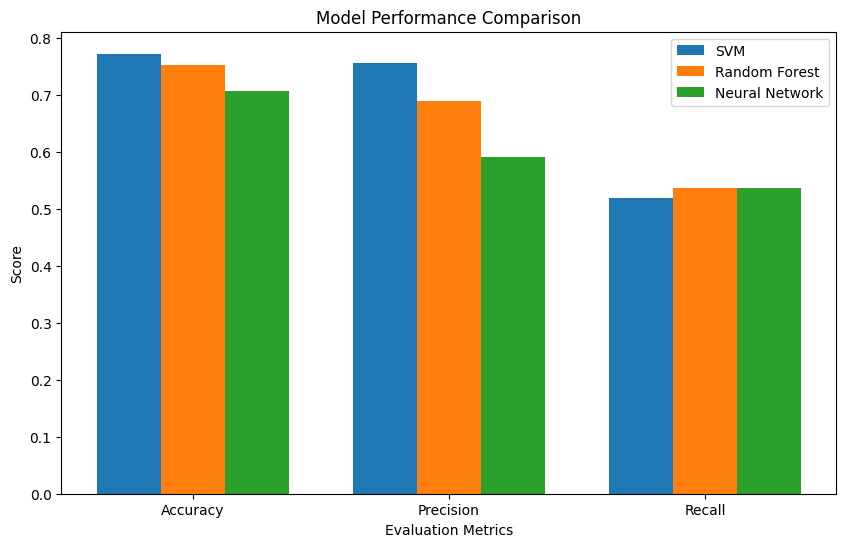

In [19]:
#Model Comparison
metrics = ["Accuracy", "Precision", "Recall"]
svm_results = [svm_accuracy, svm_precision, svm_recall]
rf_results = [rf_accuracy, rf_precision, rf_recall]
nn_results = [nn_accuracy, nn_precision, nn_recall]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, svm_results, width, label="SVM")
plt.bar(x, rf_results, width, label="Random Forest")
plt.bar(x + width, nn_results, width, label="Neural Network")

plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(x, metrics)
plt.legend()
plt.show()


<Figure size 500x400 with 0 Axes>

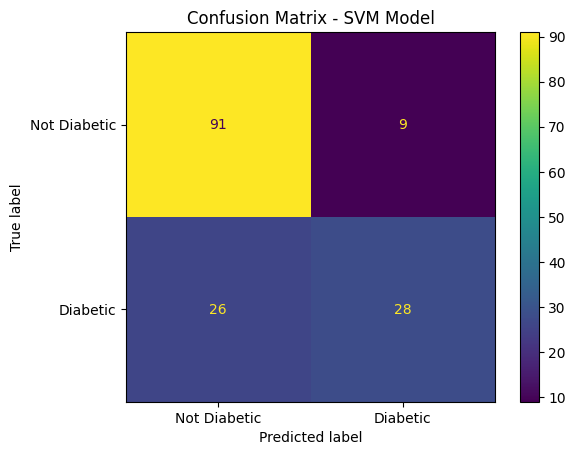

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for SVM
svm_cm = confusion_matrix(Y_test, svm_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=["Not Diabetic", "Diabetic"])
plt.figure(figsize=(5,4))
disp.plot()
plt.title("Confusion Matrix - SVM Model")
plt.show()


<Figure size 500x400 with 0 Axes>

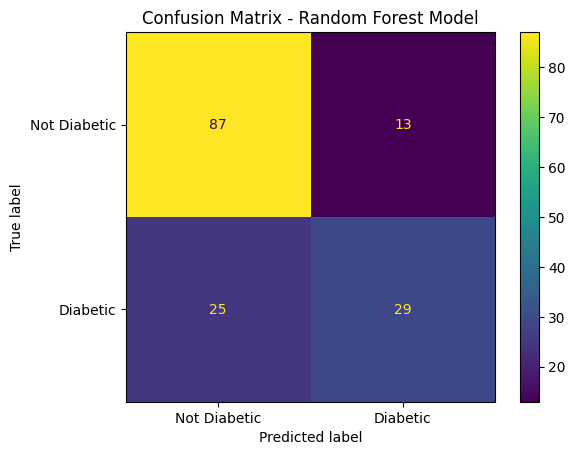

In [21]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(Y_test, rf_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=["Not Diabetic", "Diabetic"])
plt.figure(figsize=(5,4))
disp.plot()
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

<Figure size 500x400 with 0 Axes>

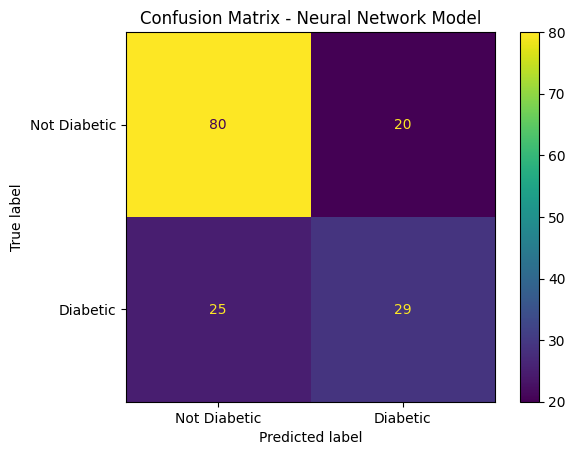

In [22]:
# Confusion Matrix for Neural Network
nn_cm = confusion_matrix(Y_test, nn_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=nn_cm, display_labels=["Not Diabetic", "Diabetic"])
plt.figure(figsize=(5,4))
disp.plot()
plt.title("Confusion Matrix - Neural Network Model")
plt.show()

PREDICTIVE SYSTEM

In [23]:
def diabetes_prediction(input_data, model="svm"):
    input_array = np.asarray(input_data).reshape(1, -1)
    std_data = scaler.transform(input_array)

    if model == "svm":
        result = svm_model.predict(std_data)
    elif model == "rf":
        result = rf_model.predict(std_data)
    elif model == "nn":
        result = nn_model.predict(std_data)
    else:
        return "Invalid model name!"

    return "The person is Diabetic" if result[0] == 1 else "The person is NOT Diabetic"

In [24]:
#Example 1

diabetes_prediction((5,166,72,19,175,25.8,0.587,51), model="svm")
diabetes_prediction((5,166,72,19,175,25.8,0.587,51), model="rf")
diabetes_prediction((5,166,72,19,175,25.8,0.587,51), model="nn")


'The person is Diabetic'

In [25]:
#Example 2
diabetes_prediction((3, 92, 70, 30, 100, 25.0, 0.200, 27), model="svm")
diabetes_prediction((3, 92, 70, 30, 100, 25.0, 0.200, 27), model="rf")
diabetes_prediction((3, 92, 70, 30, 100, 25.0, 0.200, 27), model="nn")

'The person is NOT Diabetic'